# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Beta
import thinkplot

import numpy as np

## The skeet problem

At the 2016 Summer Olympics in the Women's Skeet event, Kim Rhode faced Wei Meng in the bronze medal match.  They each hit 15 of 25 skeets, sending the match into sudden death.  In the first round, both hit 1 of 2 skeets.  In the next two rounds, they each hit 2 skeets.  Finally, in the fourth round, Rhode hit 2 and Wei hit 1, so Rhode won the bronze medal, making her the first Summer Olympian to win an individual medal at six consecutive summer games.

But after all that shooting, what is the probability that Rhode is actually a better shooter than Wei?  If the same match were held again, what is the probability that Rhode would win?

As always, you will have to make some modeling decisions, but one approach is to estimate, for each shooter, the probability of hitting a skeet.  Then, to estimate the probability that Rhode is a better shooter, you can draw samples from the two posterior distributions and compare them.  To estimate the probability of winning a rematch, you could draw samples from the posterior distributions and simulate a round of 25 shots.

In [2]:
# Solution

# Here's a Beta distribution that represents Rhode's probability
# of hitting a skeet

rhode_beta = Beta(1, 1, label='Rhode')
rhode_beta.Update((22, 11))

In [3]:
# Solution

# And another Beta for Wei

wei_beta = Beta(1, 1, label='Wei')
wei_beta.Update((21, 12))

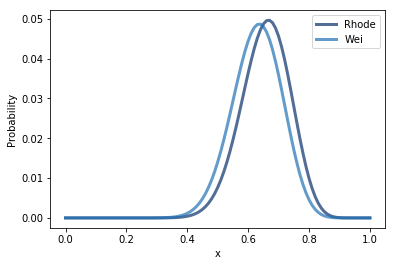

In [4]:
# Solution

# Here's what the posteriors look like

thinkplot.Pdf(rhode_beta.MakePmf())
thinkplot.Pdf(wei_beta.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

In [5]:
# Solution

# To estimate the probability of superiority, we can
# draw samples from the posteriors and compare them

rhode_sample = rhode_beta.Sample(10000)
wei_sample = wei_beta.Sample(10000)

array([0.76753424, 0.68572586, 0.57222812, ..., 0.60927265, 0.69046666,
       0.68404881])

In [6]:
# Solution

# The probability that Rhode is a better shooter is about 60%

np.mean(rhode_sample > wei_sample)

0.6076

In [7]:
# Solution

# The probability that Wei is a better shooter is about 40%

np.mean(rhode_sample < wei_sample)

0.3924

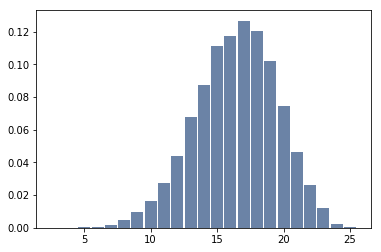

In [8]:
# Solution

# To simulate a rematch, we can draw `p` from the posterior
# distribution and then sample from a binomial distribution
# with parameters `p` and `n=25`.

rhode_rematch = np.random.binomial(25, rhode_sample)
thinkplot.Hist(Pmf(rhode_rematch))

In [9]:
# Solution

# The probability that Rhode wins a rematch (without going
# to sudden death) is about 52%

wei_rematch = np.random.binomial(25, wei_sample)
np.mean(rhode_rematch > wei_rematch)

0.53

In [10]:
# Solution

# The probability that Wei wins the rematch is about 39%

np.mean(rhode_rematch < wei_rematch)

0.3894

In [11]:
# Solution

# And the chance that the rematch also goes to sudden death is
# about 9%

# Assuming that sudden death is close to 50/50, the overall chance
# that Rhode winds is about 56%

np.mean(rhode_rematch == wei_rematch)

0.0806